In [31]:
import numpy as np
import pandas as pd
import seaborn as sns


In [32]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib 
plt.style.use('ggplot')

from matplotlib import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None

In [33]:
# Read the Data
df = pd.read_csv(r'D:\Movie Data\movies.csv')



In [59]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
0,4706,6,6,1980,1308,8.4,927000.0,1800,2841,700,46,19000000,46998772,1432,146.0,0
1,3943,6,1,1980,1131,5.8,65000.0,1581,1160,215,47,4500000,58853106,454,104.0,0
2,3654,4,0,1980,1363,8.7,1200000.0,759,1822,1161,47,18000000,538375067,949,124.0,0
3,205,4,4,1980,1131,7.7,221000.0,891,1416,1478,47,3500000,83453539,1114,88.0,0
4,734,6,4,1980,1174,7.3,108000.0,721,352,272,47,6000000,39846344,1089,98.0,0


In [35]:
for column in df.columns:
    missing_pct = np.mean(df[column].isnull())
    print('{} = {}%'.format(column, round(missing_pct*100)))    
    

name = 0%
rating = 1%
genre = 0%
year = 0%
released = 0%
score = 0%
votes = 0%
director = 0%
writer = 0%
star = 0%
country = 0%
budget = 28%
gross = 2%
company = 0%
runtime = 0%


In [36]:
#Removing the null values
df =  df.dropna(subset=['budget', 'gross'])


In [37]:
#Finding the types of the data
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [38]:
df['budget'] = df['budget'].astype('int64')

In [39]:
df['gross'] = df['gross'].astype('int64')

In [60]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
0,4706,6,6,1980,1308,8.4,927000.0,1800,2841,700,46,19000000,46998772,1432,146.0,0
1,3943,6,1,1980,1131,5.8,65000.0,1581,1160,215,47,4500000,58853106,454,104.0,0
2,3654,4,0,1980,1363,8.7,1200000.0,759,1822,1161,47,18000000,538375067,949,124.0,0
3,205,4,4,1980,1131,7.7,221000.0,891,1416,1478,47,3500000,83453539,1114,88.0,0
4,734,6,4,1980,1174,7.3,108000.0,721,352,272,47,6000000,39846344,1089,98.0,0


In [41]:
df['released_year'] = df['released'].str.extract(r'(\d{4})')

In [42]:
pd.set_option('display.max_rows',None)

In [61]:
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
0,4706,6,6,1980,1308,8.4,927000.0,1800,2841,700,46,19000000,46998772,1432,146.0,0
1,3943,6,1,1980,1131,5.8,65000.0,1581,1160,215,47,4500000,58853106,454,104.0,0
2,3654,4,0,1980,1363,8.7,1200000.0,759,1822,1161,47,18000000,538375067,949,124.0,0
3,205,4,4,1980,1131,7.7,221000.0,891,1416,1478,47,3500000,83453539,1114,88.0,0
4,734,6,4,1980,1174,7.3,108000.0,721,352,272,47,6000000,39846344,1089,98.0,0


In [44]:
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000


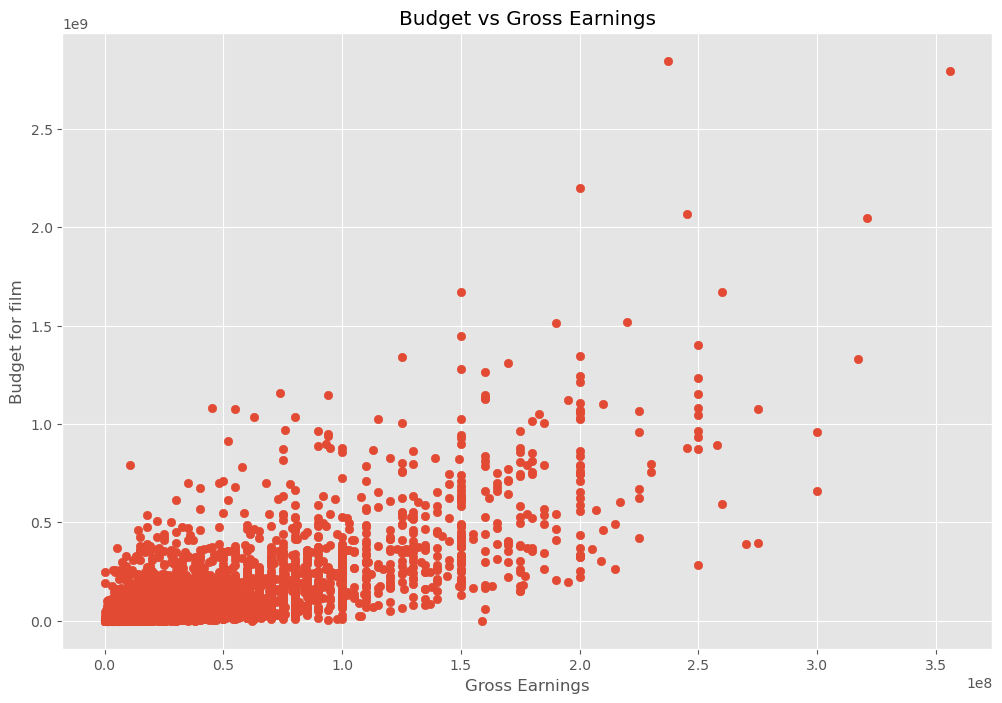

In [45]:
# Lets visualize the relation between budget and gross
plt.scatter(x=df['budget'],y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for film')

plt.show()

<AxesSubplot:xlabel='gross', ylabel='budget'>

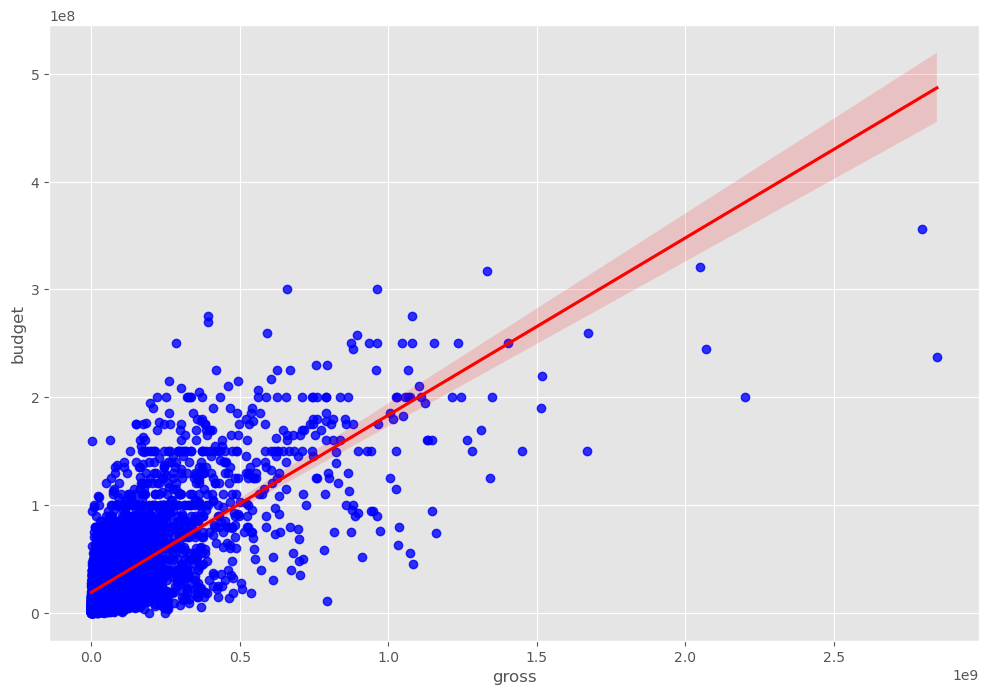

In [46]:
#Plot budget vs gross using seaborn

sns.regplot(x='gross', y='budget', data=df, line_kws={'color': 'red'}, scatter_kws={'color': 'blue'})
# It shows that they have positive relationship

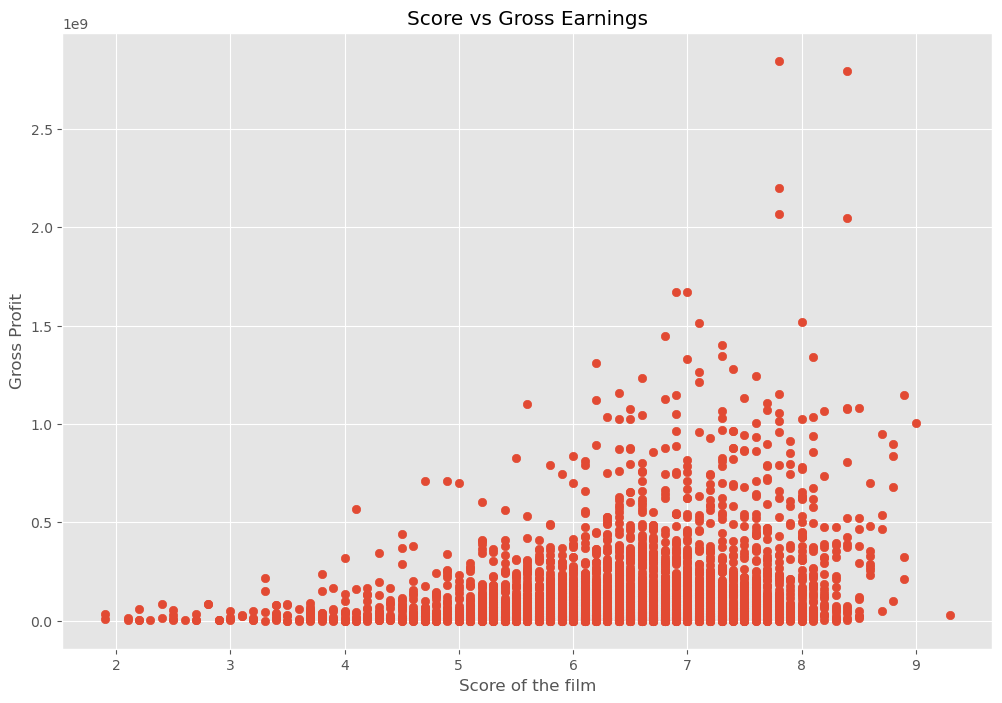

In [47]:
# Lets visualize the relation between score and gross
plt.scatter(x=df['score'],y=df['gross'])

plt.title('Score vs Gross Earnings')

plt.xlabel('Score of the film')

plt.ylabel('Gross Profit')

plt.show()

<AxesSubplot:xlabel='score', ylabel='gross'>

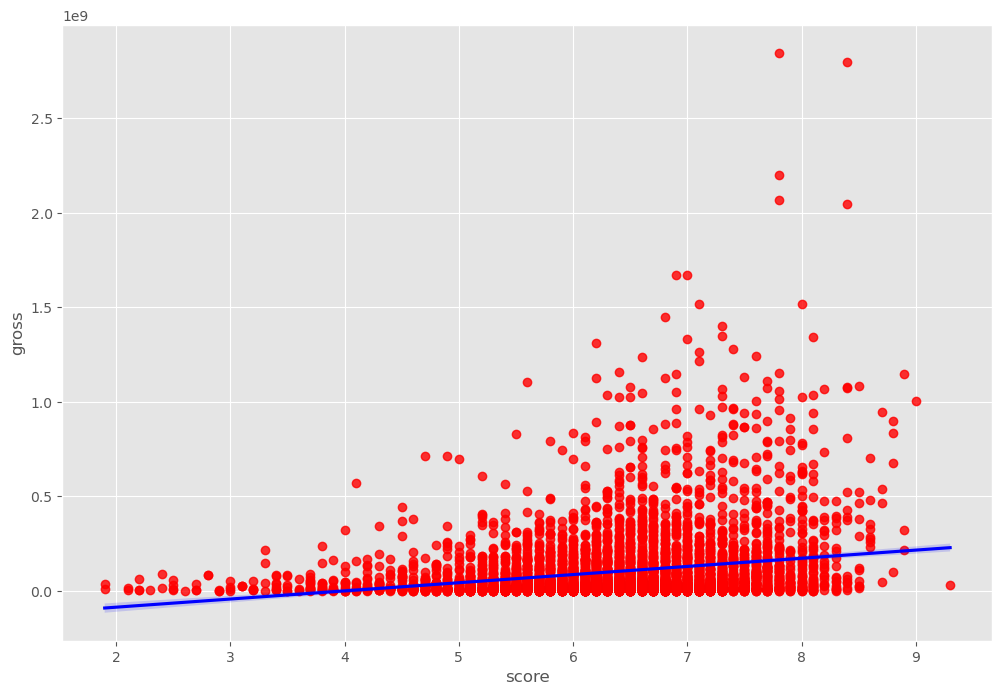

In [48]:
sns.regplot(x = 'score', y = 'gross', data = df, line_kws = {'color':'blue'}, scatter_kws = {'color':
                                                                                            "red"})

In [49]:
df.corr(method ='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000


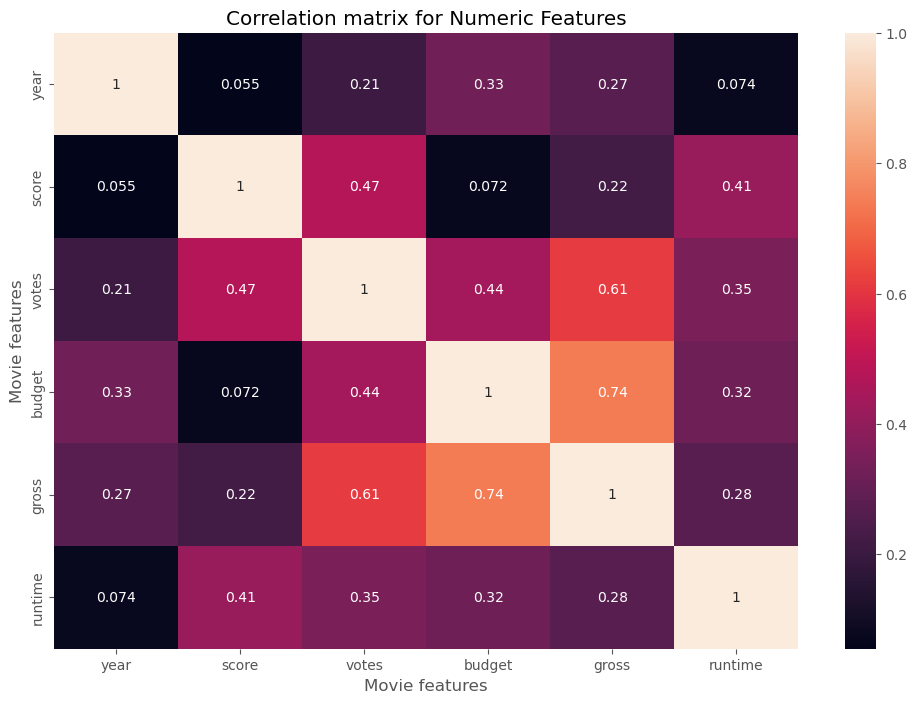

In [50]:
# Lets create a heatmap to see the correlation between the columns
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [51]:
# Using factorize - this assigns a random numeric value for each unique categorical value



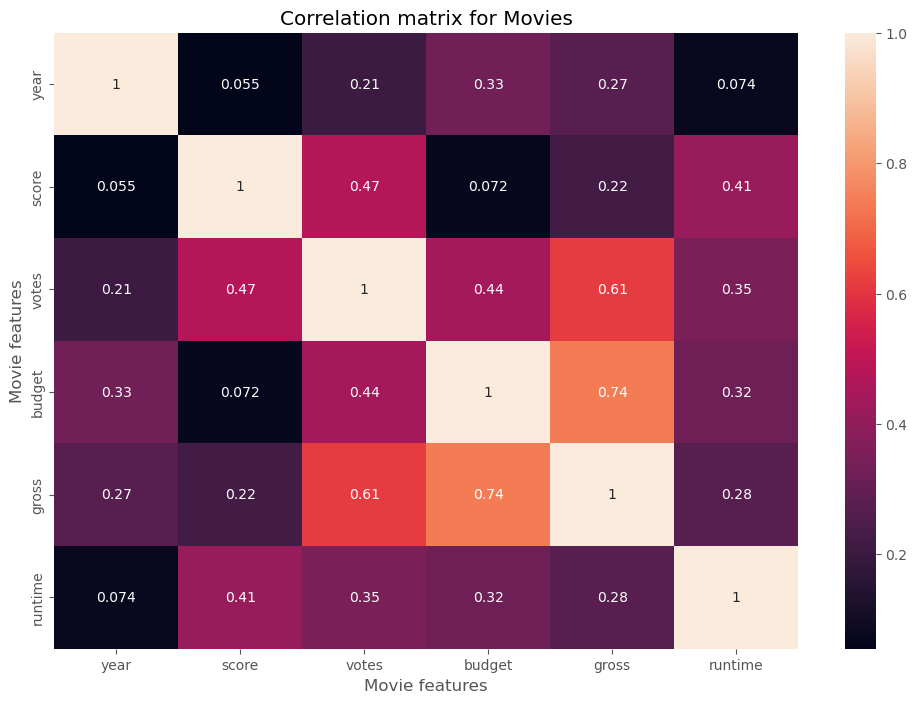

In [52]:
sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [62]:

df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
0,4706,6,6,1980,1308,8.4,927000.0,1800,2841,700,46,19000000,46998772,1432,146.0,0
1,3943,6,1,1980,1131,5.8,65000.0,1581,1160,215,47,4500000,58853106,454,104.0,0
2,3654,4,0,1980,1363,8.7,1200000.0,759,1822,1161,47,18000000,538375067,949,124.0,0
3,205,4,4,1980,1131,7.7,221000.0,891,1416,1478,47,3500000,83453539,1114,88.0,0
4,734,6,4,1980,1174,7.3,108000.0,721,352,272,47,6000000,39846344,1089,98.0,0


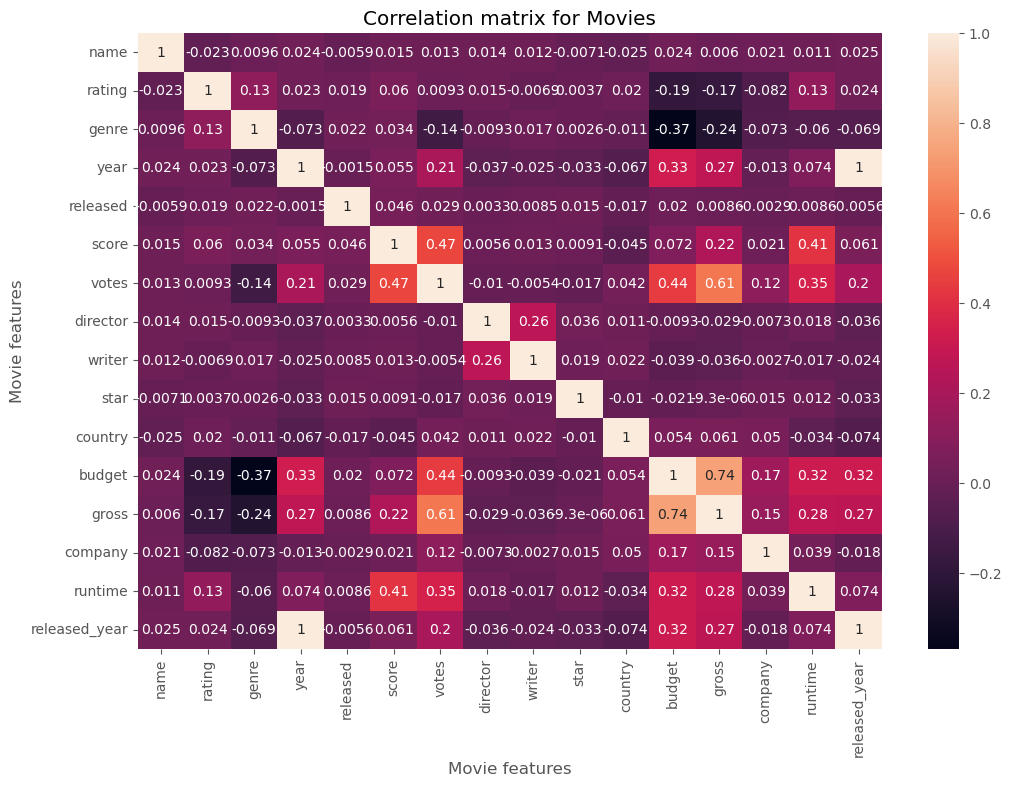

In [54]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [55]:
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

budget         genre           -0.368900
genre          budget          -0.368900
               gross           -0.244380
gross          genre           -0.244380
rating         budget          -0.186892
budget         rating          -0.186892
rating         gross           -0.168814
gross          rating          -0.168814
votes          genre           -0.136457
genre          votes           -0.136457
company        rating          -0.082189
rating         company         -0.082189
country        released_year   -0.073732
released_year  country         -0.073732
company        genre           -0.073293
genre          company         -0.073293
year           genre           -0.073026
genre          year            -0.073026
               released_year   -0.068848
released_year  genre           -0.068848
year           country         -0.066662
country        year            -0.066662
genre          runtime         -0.060186
runtime        genre           -0.060186
country        s

In [56]:
gross_corr = correlation_matrix['gross'].drop(labels=['gross'])
sorted_gross_corr = gross_corr.sort_values(ascending=False)

In [57]:
print(sorted_gross_corr)

budget           0.740395
votes            0.614904
runtime          0.275596
year             0.274264
released_year    0.268626
score            0.222143
company          0.150233
country          0.060929
released         0.008614
name             0.005966
star            -0.000009
director        -0.029366
writer          -0.035999
rating          -0.168814
genre           -0.244380
Name: gross, dtype: float64


In [58]:
# The purpose of creating the project was to find the maximum correlation between the gross and the other columns
#Which is completed by finding the 
#Gross mostly depends upon budget and votes